In [7]:
from sklearn.cluster import KMeans
from matplotlib.image import imread
import matplotlib.pyplot as plt

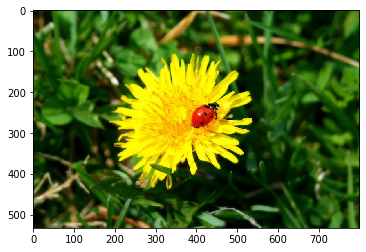

In [9]:
img = imread(r'C:\Users\PanduranganR\Documents\Project\Arbit\Courses\AGeron_HandsOnML\images\unsupervised_learning\ladybug.png')
plt.imshow(img)

In [12]:
img_reshape = img.reshape(-1, 3)
img_reshape.shape

(426400, 3)

Cluster : 2
 Cluster : 6
 Cluster : 10
 Cluster : 14
 Cluster : 18


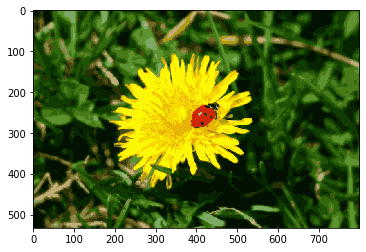

In [29]:
for i in range(2, 20, 4):
    print(f" Cluster : {i}")
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(img_reshape)
    plt.imshow(kmeans.cluster_centers_[kmeans.labels_].reshape(img.shape))

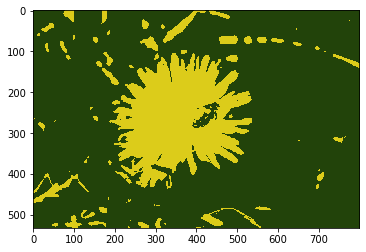

In [30]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(img_reshape)
plt.imshow(kmeans.cluster_centers_[kmeans.labels_].reshape(img.shape))

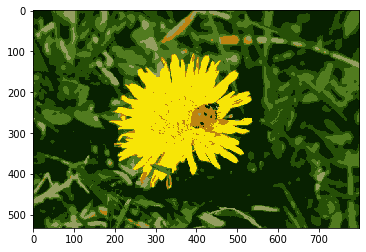

In [31]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(img_reshape)
plt.imshow(kmeans.cluster_centers_[kmeans.labels_].reshape(img.shape))

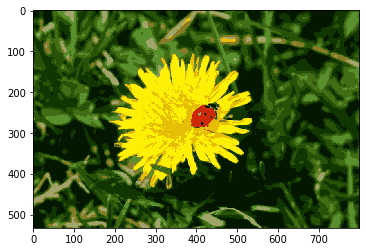

In [32]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(img_reshape)
plt.imshow(kmeans.cluster_centers_[kmeans.labels_].reshape(img.shape))

In [37]:
from sklearn.datasets import load_digits
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

mnist = load_digits()
X, y = mnist["data"], mnist["target"]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
# Log Reg
log_reg = Pipeline([
    ("log", LogisticRegression())
])

log_reg.fit(xtrain, ytrain)
y_pred = log_reg.predict(xtest)
accuracy_score(y_pred, ytest)

0.9694444444444444

In [42]:
#  with kmeans
log_reg = Pipeline([
    ("kmeans", KMeans(n_clusters = 50)),
    ("log", LogisticRegression())
])

log_reg.fit(xtrain, ytrain)
y_pred = log_reg.predict(xtest)
accuracy_score(y_pred, ytest)

0.975

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(log_reg, param_grid, cv = 3, verbose = 2)
grid_clf.fit(xtrain, ytrain)

............ kmeans__n_clusters=53, total=   0.5s
[CV] kmeans__n_clusters=53 ...........................................
[CV] ............................ kmeans__n_clusters=53, total=   0.7s
[CV] kmeans__n_clusters=53 ...........................................
[CV] ............................ kmeans__n_clusters=53, total=   1.1s
[CV] kmeans__n_clusters=54 ...........................................
[CV] ............................ kmeans__n_clusters=54, total=   1.0s
[CV] kmeans__n_clusters=54 ...........................................
[CV] ............................ kmeans__n_clusters=54, total=   0.8s
[CV] kmeans__n_clusters=54 ...........................................
[CV] ............................ kmeans__n_clusters=54, total=   0.8s
[CV] kmeans__n_clusters=55 ...........................................
[CV] ............................ kmeans__n_clusters=55, total=   0.8s
[CV] kmeans__n_clusters=55 ...........................................
[CV] ......................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [46]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise = 0.05)
dbscan = DBSCAN(eps = 0.05, min_samples = 5)
dbscan.fit(X, y)

DBSCAN(eps=0.05)

In [53]:
dbscan.labels_

array([[-0.9795394 ,  0.35366303],
       [ 0.6044294 ,  0.80499761],
       [ 2.00465646,  0.23415573],
       ...,
       [ 0.05121741,  0.40320096],
       [ 0.68467651,  0.61779768],
       [-0.586104  ,  0.85555539]])

# Exercises

In [85]:
from sklearn.datasets import olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

In [58]:
ofaces = sklearn.datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\PanduranganR\scikit_learn_data


In [81]:
X, y = ofaces["images"], ofaces["target"].reshape(-1, 1)

In [92]:
xtrain, xtest, ytrain, ytest = train_test_split(X.reshape(400, -1), y, test_size = 0.2, random_state = 42, stratify = y)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size = 0.2, random_state = 42, stratify = ytrain)

In [102]:
kmeans_per_cluster = []
for cluster in range(2, 150, 4):
    print(f"cluster : {cluster}")
    kmeans = KMeans(n_clusters = cluster).fit(xtrain)
    kmeans_per_cluster.append(kmeans)

cluster : 2
cluster : 6
cluster : 10
cluster : 14
cluster : 18
cluster : 22
cluster : 26
cluster : 30
cluster : 34
cluster : 38
cluster : 42
cluster : 46
cluster : 50
cluster : 54
cluster : 58
cluster : 62
cluster : 66
cluster : 70
cluster : 74
cluster : 78
cluster : 82
cluster : 86
cluster : 90
cluster : 94
cluster : 98
cluster : 102
cluster : 106
cluster : 110
cluster : 114
cluster : 118
cluster : 122
cluster : 126
cluster : 130
cluster : 134
cluster : 138
cluster : 142
cluster : 146


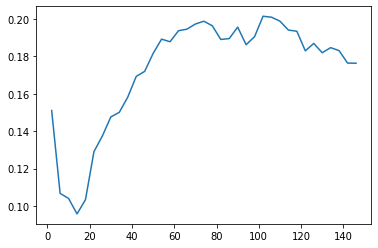

In [103]:
score = [silhouette_score(xtrain, model.labels_) for model in kmeans_per_cluster]
plt.plot(range(2, 150, 4), score)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

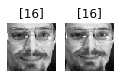

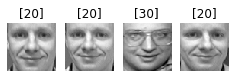

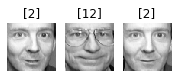

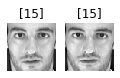

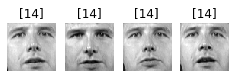

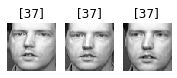

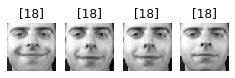

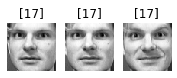

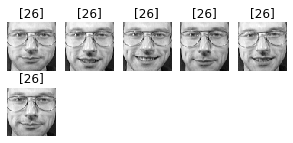

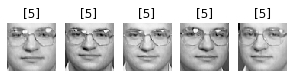

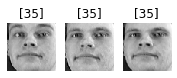

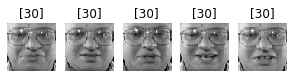

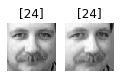

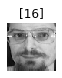

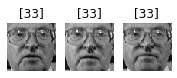

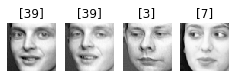

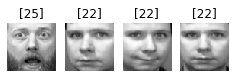

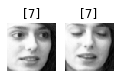

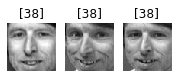

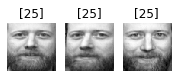

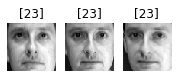

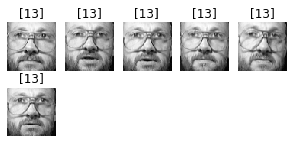

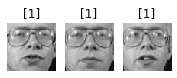

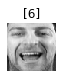

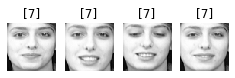

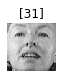

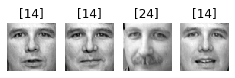

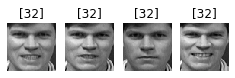

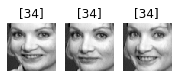

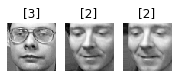

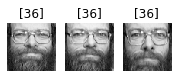

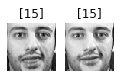

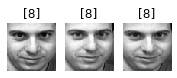

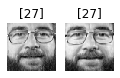

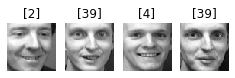

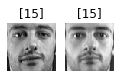

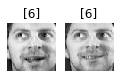

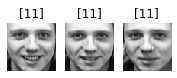

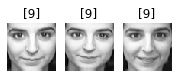

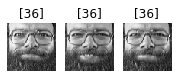

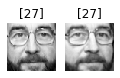

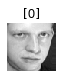

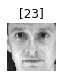

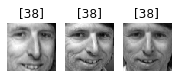

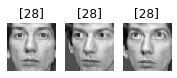

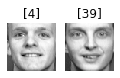

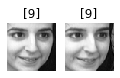

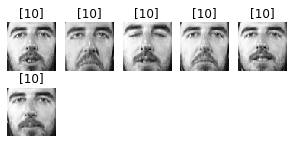

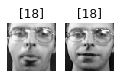

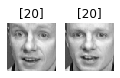

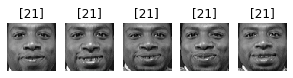

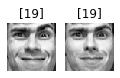

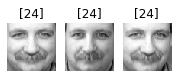

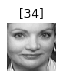

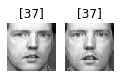

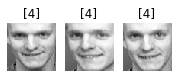

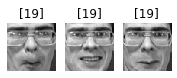

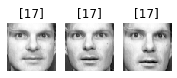

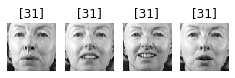

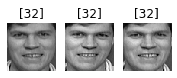

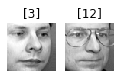

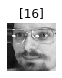

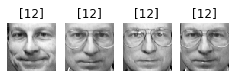

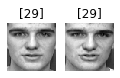

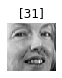

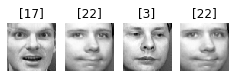

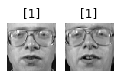

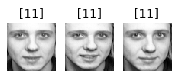

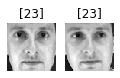

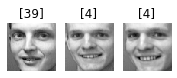

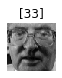

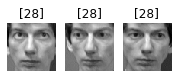

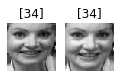

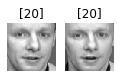

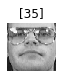

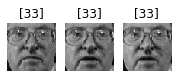

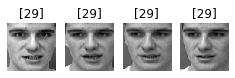

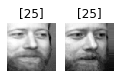

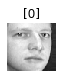

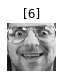

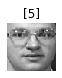

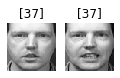

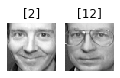

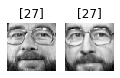

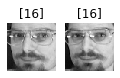

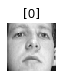

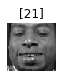

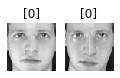

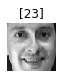

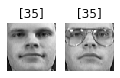

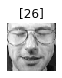

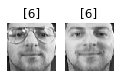

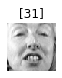

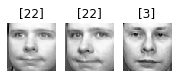

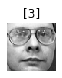

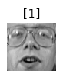

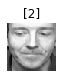

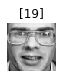

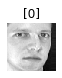

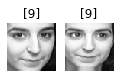

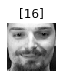

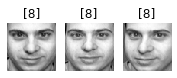

In [105]:
best_index = np.argmax(score)
best_model = kmeans_per_cluster[best_index]

def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    index = best_model.labels_ == cluster_id
    faces = xtrain[index].reshape(-1, 64, 64)
    labels = ytrain[index]
    plot_faces(faces, labels)

In [107]:
## KMeans as dimensionality reduction

# Get baseline accuracy

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 150, random_state = 42)
rf_clf.fit(xtrain, ytrain)
rf_clf.score(xval, yval)

0.890625

In [111]:
# Reduce dimensions using Kmeans
xtrain_red = best_model.transform(xtrain)
xval_red = best_model.transform(xval)
xtest_red = best_model.transform(xtest)

rf_clf = RandomForestClassifier(n_estimators = 150, random_state = 42)
rf_clf.fit(xtrain_red, ytrain)
rf_clf.score(xval_red, yval)

0.765625

In [114]:
from sklearn.pipeline import Pipeline

for n_clusters in range(5, 150, 5):
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters = n_clusters)),
        ("rf_clf", RandomForestClassifier(n_estimators = 150, random_state = 42))
    ])
    pipeline.fit(xtrain, ytrain)
    print(n_clusters, pipeline.score(xval, yval))

5 0.421875
10 0.46875
15 0.609375
20 0.59375
25 0.65625
30 0.734375
35 0.71875
40 0.71875
45 0.65625
50 0.75
55 0.734375
60 0.71875
65 0.703125
70 0.75
75 0.71875
80 0.78125
85 0.75
90 0.78125
95 0.71875
100 0.765625
105 0.78125
110 0.75
115 0.78125
120 0.75
125 0.78125
130 0.765625
135 0.796875
140 0.796875
145 0.796875


In [118]:
best_model

KMeans(n_clusters=102)

In [119]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 10, random_state = 42)
ypred = gmm.fit_predict(xtrain)

In [ ]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gmm.sample(n_samples=n_gen_faces)
plot_faces(gen_faces_reduced, y_gen_faces)